In [64]:
# Наивный байесовский классификатор

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# 1
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

In [66]:
df.iloc[:5,:]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [67]:
# 2
cnt = df[0].value_counts()
p0 = cnt['p']/cnt.sum()
z0 = np.log(p0) - np.log(1.0 - p0) 
print(p0,z0)
cnt

0.48202855736090594 -0.07191675076714477


e    4208
p    3916
Name: 0, dtype: int64

In [68]:
df[0].value_counts()

e    4208
p    3916
Name: 0, dtype: int64

In [69]:
df.groupby(0)[1].count()

0
e    4208
p    3916
Name: 1, dtype: int64

In [70]:
df.groupby(5)[0].value_counts().unstack().fillna(0)

,e,p
5,,
a,400.0,0.0
c,0.0,192.0
f,0.0,2160.0
l,400.0,0.0
m,0.0,36.0
n,3408.0,120.0
p,0.0,256.0
s,0.0,576.0
y,0.0,576.0


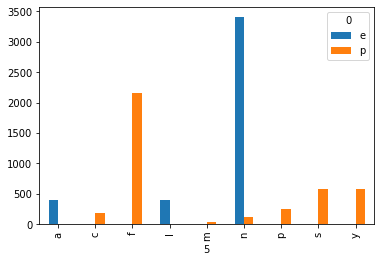

In [71]:
df.groupby(5)[0].value_counts().unstack().fillna(0).plot.bar()

In [72]:
f9 = df.groupby(9)[0].value_counts().unstack().fillna(0)
f9['prob'] = (f9['p']+1)/(f9['p']+f9['e']+2)#f9.sum(axis=1)
f9

,e,p,prob
9,,,
b,0.0,1728.0,0.999422
e,96.0,0.0,0.010204
g,248.0,504.0,0.669761
h,204.0,528.0,0.720708
k,344.0,64.0,0.158537
n,936.0,112.0,0.107619
o,64.0,0.0,0.015152
p,852.0,640.0,0.429050
r,0.0,24.0,0.961538


In [73]:
df['prob9'] = df[9].map(lambda x: f9.at[x,'prob'])
df['inv_sig9'] = np.log(df['prob9']) - np.log(1.0 - df['prob9']) - z0
df['sig9'] = 1.0/(1.0+np.exp(-(df['inv_sig9']+z0)))
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,prob9,inv_sig9,sig9
0,p,x,s,n,t,p,f,c,n,k,...,p,w,o,p,k,s,u,0.158537,-1.597240,0.158537
1,e,x,s,y,t,a,f,c,b,k,...,p,w,o,p,n,n,g,0.158537,-1.597240,0.158537
2,e,b,s,w,t,l,f,c,b,n,...,p,w,o,p,n,n,m,0.107619,-2.043379,0.107619
3,p,x,y,w,t,p,f,c,n,n,...,p,w,o,p,k,s,u,0.107619,-2.043379,0.107619
4,e,x,s,g,f,n,f,w,b,k,...,p,w,o,e,n,a,g,0.158537,-1.597240,0.158537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,p,o,o,p,b,c,l,0.261364,-0.966976,0.261364
8120,e,x,s,n,f,n,a,c,b,y,...,p,n,o,p,b,v,l,0.261364,-0.966976,0.261364
8121,e,f,s,n,f,n,a,c,b,n,...,p,o,o,p,b,c,l,0.107619,-2.043379,0.107619
8122,p,k,y,n,f,y,f,c,n,b,...,p,w,o,e,w,v,l,0.999422,7.527215,0.999422


In [77]:
df['prob9'] = df[9].map(lambda x: f9['prob'][x])
f9[['e','p']].min(axis=1).sum()

1584.0

In [78]:
for i in range(1,23):
    f = df.groupby(i)[0].value_counts().unstack().fillna(0)
    print(i,f.min(axis=1).sum())

1 3540.0
2 3408.0
3 3288.0
4 2080
5 120.0
6 3916
7 3120
8 1980
9 1584.0
10 3632
11 2876.0
12 1832
13 1900
14 2304.0
15 2320.0
16 3916
17 3908.0
18 3752.0
19 1824.0
20 1072.0
21 2260.0
22 2516.0


In [79]:
df.groupby(6)[0].value_counts().unstack().fillna(0)

,e,p
6,,
a,192,18
f,4016,3898
